In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

C:\Users\sg\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df=pd.read_csv('USA_Housing.csv')

In [3]:
df

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316


In [4]:
df.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [7]:
df.drop(columns=['Address'],axis=1,inplace=True)

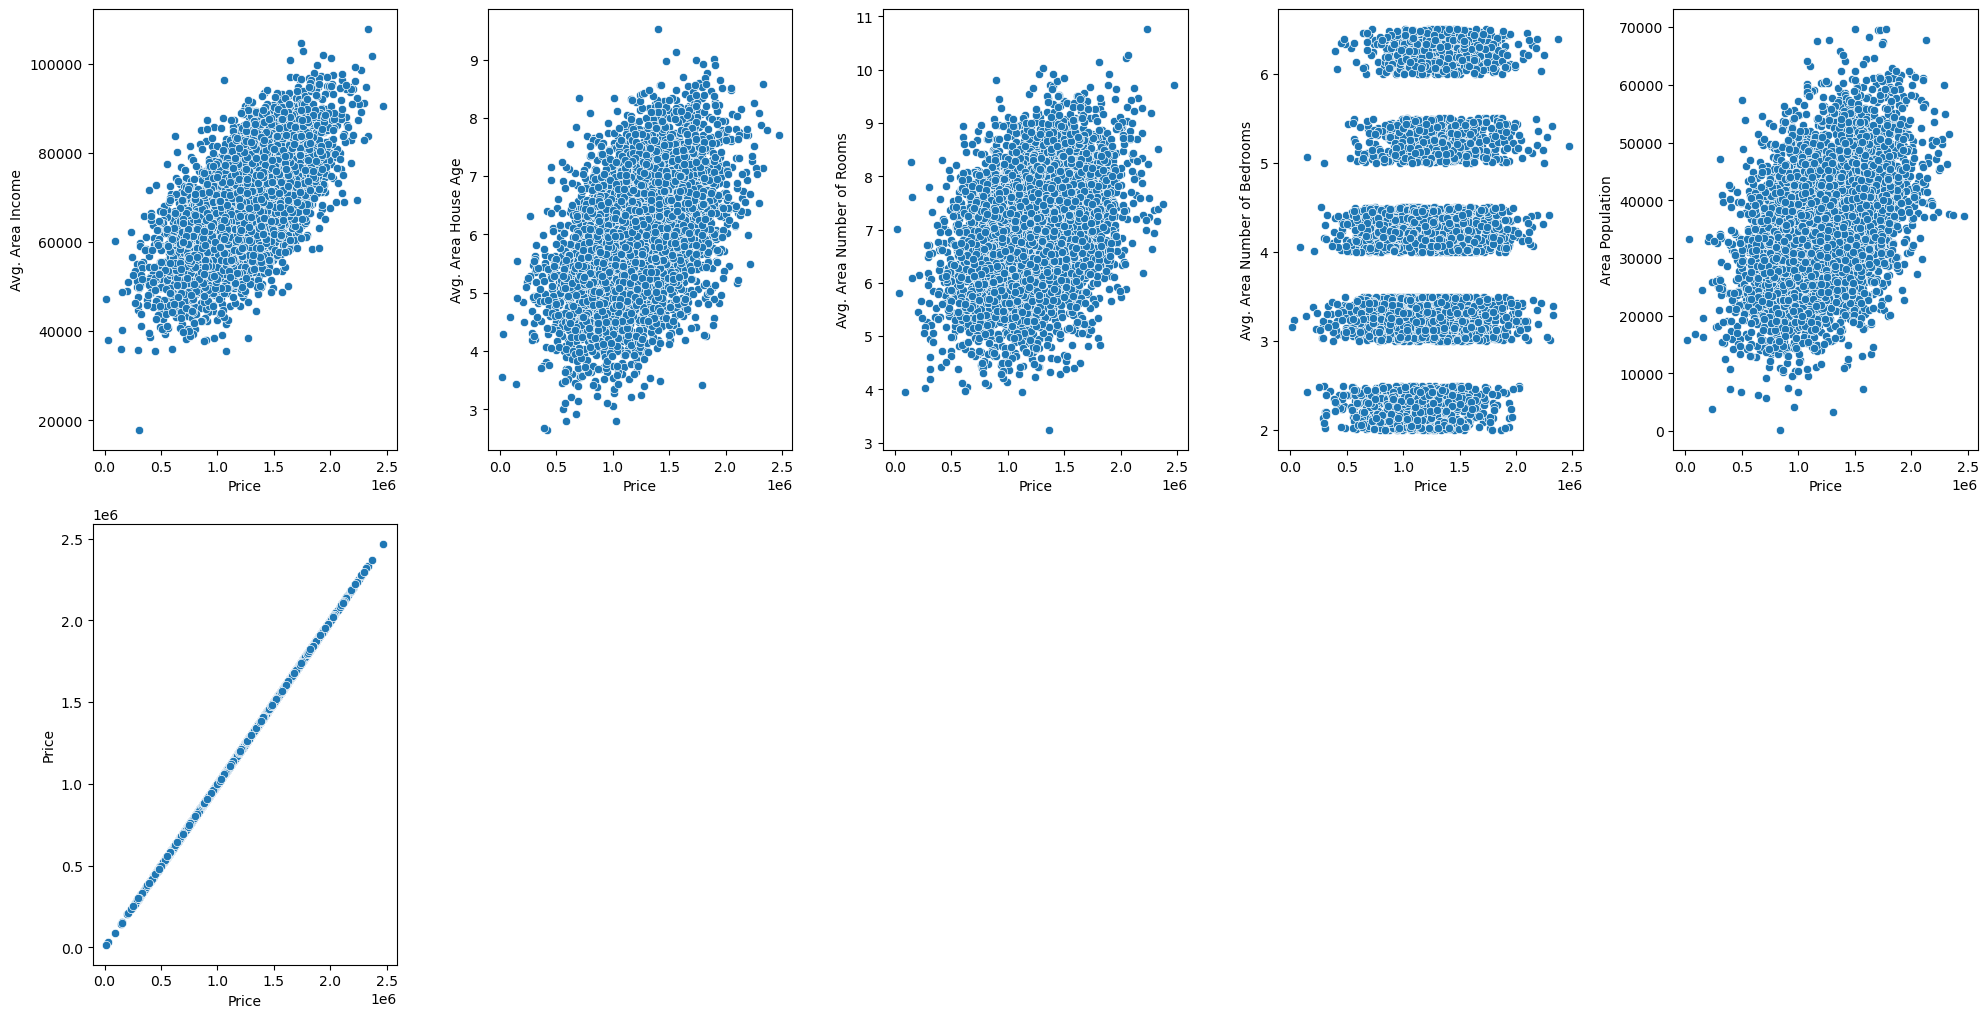

In [8]:
import seaborn as sns
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in df:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.scatterplot(x = df['Price'], y = df[column])
        
    plotnumber += 1

plt.tight_layout()
plt.show()

In [9]:
X=df.drop(columns=['Price'],axis=1)
y=df['Price']

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [11]:
X_scaled

array([[ 1.02865969, -0.29692705,  0.02127433,  0.08806222, -1.31759867],
       [ 1.00080775,  0.02590164, -0.25550611, -0.72230146,  0.40399945],
       [-0.68462916, -0.11230283,  1.5162435 ,  0.93084045,  0.07240989],
       ...,
       [-0.48723454,  1.28447022, -2.17026949, -1.50025059, -0.29193658],
       [-0.05459152, -0.44669439,  0.14154061,  1.18205319,  0.65111608],
       [-0.28831272,  0.01521477, -0.19434166,  0.07185495,  1.04162464]])

In [13]:
from sklearn.model_selection import train_test_split 
X_train , X_test , y_train , y_test = train_test_split(X_scaled,y, train_size = 0.85) 

In [19]:
from sklearn.svm import SVR
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_lin = SVR(kernel='linear', C=1e3)
svr_poly = SVR(kernel='poly', C=1e3, degree=2)

In [20]:
svr_lin.fit(X_train, y_train)
print(f" The Accuracy is : {svr_lin.score(X_train , y_train)}%")
print(f" The Accuracy is : {svr_lin.score(X_test , y_test)}%")

 The Accuracy is : 0.9165267387126376%
 The Accuracy is : 0.9207693477181922%


In [22]:
# Bad Accuracy
svr_rbf.fit(X_train, y_train)
print(f" The Accuracy is : {svr_rbf.score(X_train , y_train)}%")
print(f" The Accuracy is : {svr_rbf.score(X_test , y_test)}%")

 The Accuracy is : 0.676078376991519%
 The Accuracy is : 0.6797682683608868%


In [23]:
# Bad Accuracy
svr_poly.fit(X_train, y_train)
print(f" The Accuracy is : {svr_poly.score(X_train , y_train)}%")
print(f" The Accuracy is : {svr_poly.score(X_test , y_test)}%")

 The Accuracy is : 0.002811904191568959%
 The Accuracy is : -0.013690194773754882%


In [24]:
poly = PolynomialFeatures(degree=4)
new_x = poly.fit_transform(X_scaled)

In [25]:
from sklearn.model_selection import train_test_split 
X_train , X_test , y_train , y_test = train_test_split(new_x,y, train_size = 0.85) 

In [26]:
m = LinearRegression()
m.fit(X_train , y_train)
print(f" The Accuracy is : {m.score(X_train , y_train)}%")
print(f" The Accuracy is : {m.score(X_test , y_test)}%")

 The Accuracy is : 0.9204422667915705%
 The Accuracy is : 0.9134998098755699%
